<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/WoW_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WoW OCR - Screenshot to Text

In [ ]:
!pip install wow-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=17e14d22a046b9d21642abf4cc633d3e254070bb6ef046ec338588aeec941f45
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


## Initialize Pipeline

In [ ]:
import zipfile
import datetime
import string
import math
import os
import sys
import keras_ocr
import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

import numpy

tf.compat.v1.disable_eager_execution()
tf.compat.v1.experimental.output_all_intermediates(True)

Looking for /root/.keras-ocr/detector_craft_mlt_25k.h5
Looking for /root/.keras-ocr/recognizer_wow_ocr.h5


## Parsing Screenshots

In [ ]:
# Screenshots example
images = [
    wow_ocr.tools.read(url)
    for url in [
        "https://archive.thealphaproject.eu/media/Alpha-Project-Archive/UNSORTED/www_judgehype_com/Galerie%20d-images%20-%20Beta%20screenshots%20-%2020%20octobre%20-%20Mathieu%20Raid%20-%20World%20of%20Warcraft%20-%20JudgeHype%20-%2004-09-2021%2002-20-20/20%20october%2004%20-%2015.jpg",
        "https://archive.thealphaproject.eu/media/Alpha-Project-Archive/Images/Azeroth/Eastern%20Kingdoms/Stranglethorn%20Vale/WoWScrnShot_061904_102357.jpg",
    ]
]

# Results - Image to Text
prediction_groups = pipeline.recognize(images)
# # Each list of predictions in prediction_groups is a list of
# # (word, box) tuples.

8/8 [==============================] - 66s 8s/step


## Plot Results

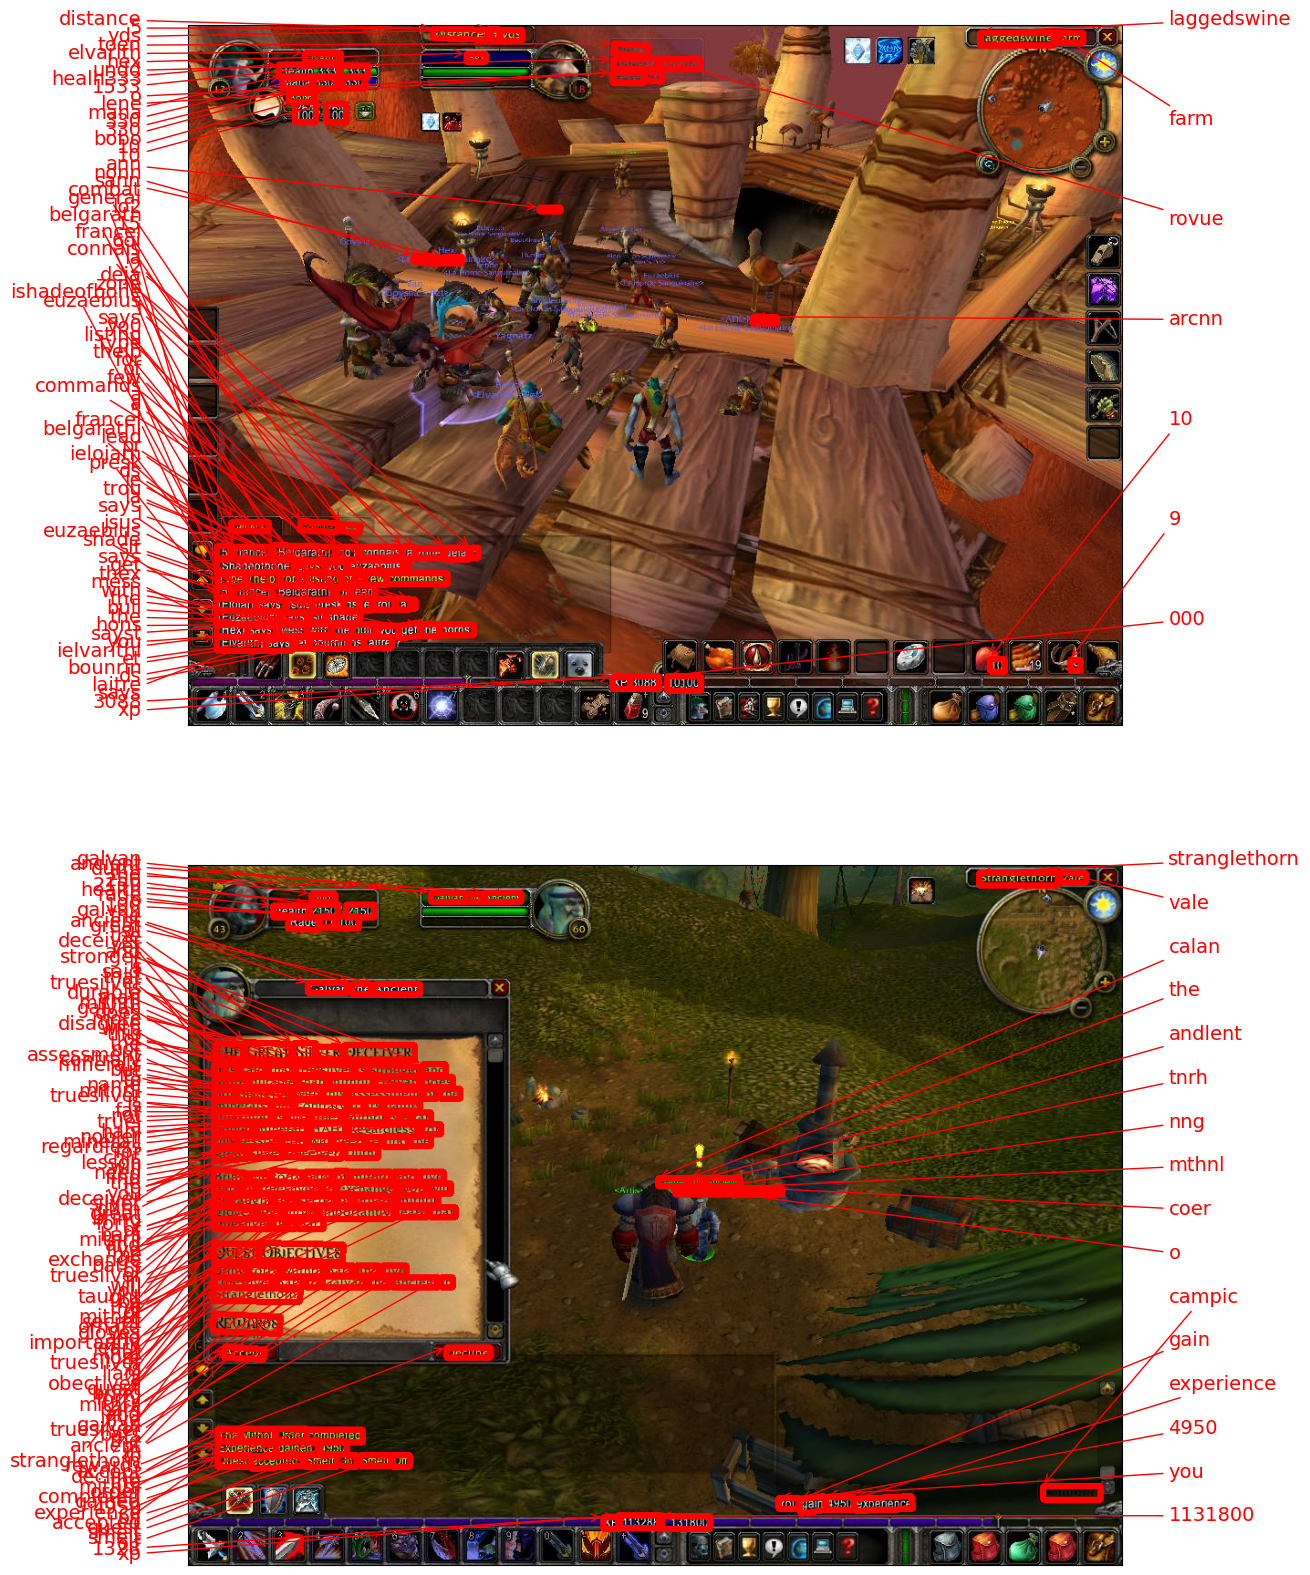

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    wow_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)